In [2]:
import pandas as pd
df = pd.read_excel('https://query.data.world/s/rvigegdpmbwlxhnbwte5fsc46st2vg',engine='openpyxl')

In [3]:
df.head()

,Coach,School,Seasons Coaching,Wins,Losses,Win Percentage
0,Mark Few,Gonzaga,18,503,113,0.817
1,Roy Williams,North Carolina,29,816,216,0.791
2,John Calipari,Kentucky,25,652,191,0.773
3,Mike Krzyzewski,Duke,42,1071,330,0.764
4,Bill Self,Kansas,24,623,193,0.763


In [4]:
df.describe()

,Seasons Coaching,Wins,Losses,Win Percentage
count,101.000000,101.000000,101.000000,101.000000
mean,17.653465,368.653465,199.049505,0.643337
std,9.479911,203.455766,102.952453,0.055146
min,5.000000,94.000000,52.000000,0.573000
25%,10.000000,194.000000,116.000000,0.602000
50%,16.000000,352.000000,175.000000,0.630000
75%,23.000000,506.000000,278.000000,0.671000
max,42.000000,1071.000000,466.000000,0.817000


In [5]:
df.corr()

,Seasons Coaching,Wins,Losses,Win Percentage
Seasons Coaching,1.000000,0.967091,0.947701,0.165074
Wins,0.967091,1.000000,0.845604,0.370498
Losses,0.947701,0.845604,1.000000,-0.119090
Win Percentage,0.165074,0.370498,-0.119090,1.000000


In [6]:
import seaborn as sns

<AxesSubplot:>

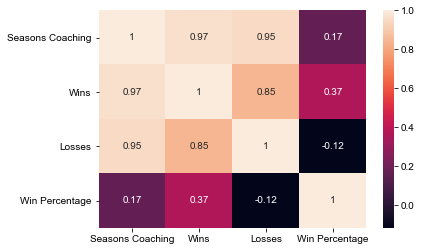

In [8]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Seasons Coaching', ylabel='Wins'>

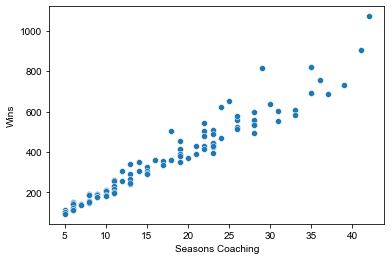

In [9]:
sns.scatterplot(
    x=df['Seasons Coaching'],
    y=df['Wins']
)

In [69]:
from sklearn.model_selection import train_test_split

In [58]:
x = df['Seasons Coaching']
y = df['Wins']

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.70)

In [70]:
import xgboost

In [71]:
model = xgboost.XGBRegressor()

In [72]:
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
yhat = model.predict(x_test)

In [80]:
yhat.reshape(-1,1)

array([[575.9997 ],
       [732.99915],
       [177.33394],
       [222.75012],
       [402.24997],
       [336.0027 ],
       [177.33394],
       [818.9979 ],
       [732.99915],
       [284.50043],
       [556.6672 ],
       [575.9997 ],
       [689.00104],
       [222.75012],
       [222.75012],
       [203.75043],
       [402.24997],
       [467.99918],
       [467.99918],
       [222.75012],
       [186.49881],
       [128.57152],
       [177.33394],
       [575.9997 ],
       [ 99.00076],
       [502.99698],
       [467.99918],
       [601.0002 ],
       [556.6672 ],
       [186.49881],
       [ 99.00076]], dtype=float32)

In [85]:
y_test[:,0]

array([ 513,  903,  188,  228,  413,  354,  157,  691, 1071,  248,  492,
        524,  754,  199,  215,  182,  378,  414,  481,  260,  180,  151,
        148,  559,  113,  360,  544,  551,  556,  186,  102], dtype=int64)

In [75]:
import matplotlib.pyplot as plt

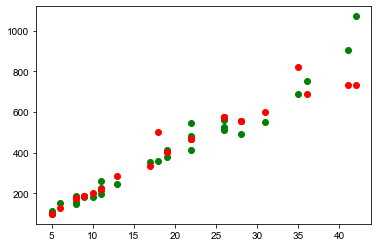

In [90]:
plt.scatter(x_test,y_test,color='green')
plt.scatter(x_test,yhat,color='red')